In [6]:
import pandas as pd

In [7]:
# konstanta yang diberikan
k21, k12, k, v1, v2, tb = 0.29, 0.31, 0.16, 6, 0.25, 1

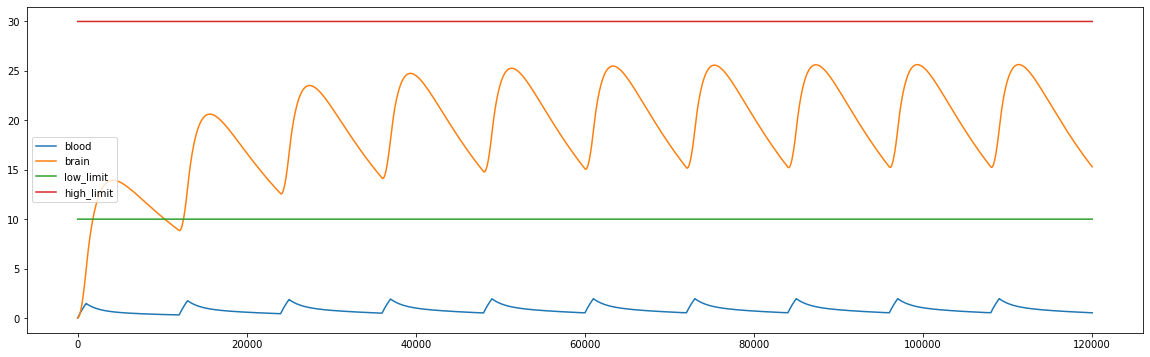

In [8]:
dt = 0.001
a = [0] # mencatat konsentrasi obat di darah setiap iterasi
b = [0] # mencatat konsentrasi obat di otak  setiap iterasi


# andaikan pasien perlu makan obat 10 kali
for tablet_ke in range(10):

    D = 10.78 # dengan "rate of uptake" obat D mg/hour
    # multiple doses diperbolehkan dalam simulasi ini
    # Dalam hal ini urang ambil D == satu pil obat aja
    t = 0

    while t<=tb: # obat masih ada di lambung
        c1 = a[-1] + ( -(k+k21)   *a[-1] + k12*v2/v1*b[-1] + D/v1)*dt
        c2 = b[-1] + (  v1*k21/v2 *a[-1] - k12      *b[-1]       )*dt
        a.append(c1)
        b.append(c2)
        t += dt

    D=0 # obat sudah larut ke dalam darah
    
    # jalankan simulasi konsentrasi obat untuk 11 jam kedepan (tb==1 btw)
    # as matter of convience, pemilihan waktu yang mungkin dalam simulasi ini
    #    6 jam sekali (4x sehari) batas maksimum
    #    8 jam sekali (3x sehari) ... btw, gatau apakah ini ide bagus
    #   12 jam sekali (2x sehari)
    #   24 jam sekali (1x sehari) batas minimum
    #
    # dalam kasus ini, urang pilih obat perlu diminum 12 jam sekali
    while t<=12*tb:
        c1 = a[-1] + ( -(k+k21)  *a[-1] + k12*v2/v1*b[-1] + D/v1)*dt
        c2 = b[-1] + (  v1*k21/v2*a[-1] - k12      *b[-1]       )*dt
        a.append(c1)
        b.append(c2)
        t += dt


# bikin plot
res = pd.DataFrame({'blood':a, 'brain':b})
res['low_limit']  = 10 # batas bawah konsentrasi
res['high_limit'] = 30 # batas atas  konsentrasi

res.plot(figsize=[20, 6])

In [9]:
tb = 8

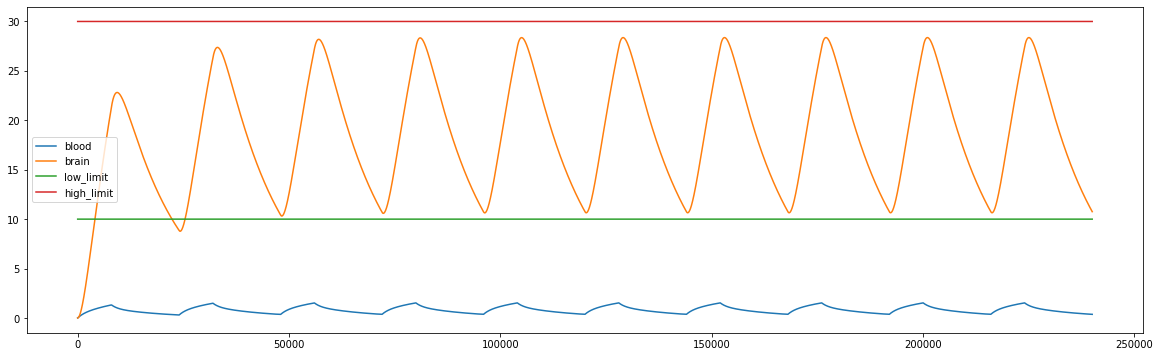

In [10]:
dt = 0.001
a = [0] # mencatat konsentrasi obat di darah setiap iterasi
b = [0] # mencatat konsentrasi obat di otak  setiap iterasi


# andaikan pasien perlu makan obat 10 kali
for tablet_ke in range(10):

    D = 2.45
    t = 0

    while t<=tb: # obat masih ada di lambung
        c1 = a[-1] + ( -(k+k21)   *a[-1] + k12*v2/v1*b[-1] + D/v1)*dt
        c2 = b[-1] + (  v1*k21/v2 *a[-1] - k12      *b[-1]       )*dt
        a.append(c1)
        b.append(c2)
        t += dt

    D=0 
    
    while t<=3*tb: # dengan kata lain, minum obat setiap 24 jam
        c1 = a[-1] + ( -(k+k21)  *a[-1] + k12*v2/v1*b[-1] + D/v1)*dt
        c2 = b[-1] + (  v1*k21/v2*a[-1] - k12      *b[-1]       )*dt
        a.append(c1)
        b.append(c2)
        t += dt

# bikin plot
res = pd.DataFrame({'blood':a, 'brain':b})
res['low_limit']  = 10 # batas bawah konsentrasi
res['high_limit'] = 30 # batas atas  konsentrasi

res.plot(figsize=[20, 6])